### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

### Read data

In [2]:
data=sklearn.datasets.load_boston()

In [3]:
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


Add target feature in the dataset

In [7]:
df['PRICE']=data.target

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Shape of the dataset

In [9]:
df.shape

(506, 14)

In [10]:
print("Number of rows = ", df.shape[0])
print("Number of columns = ", df.shape[1])

Number of rows =  506
Number of columns =  14


Check number of missing values

In [11]:
df.isna().apply(pd.value_counts).T

,False
CRIM,506
ZN,506
INDUS,506
CHAS,506
NOX,506
RM,506
AGE,506
DIS,506
RAD,506
TAX,506


Statistical Measures

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [13]:
corr=df.corr()

In [14]:
corr[['PRICE']]

,PRICE
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


Plotting heatmap

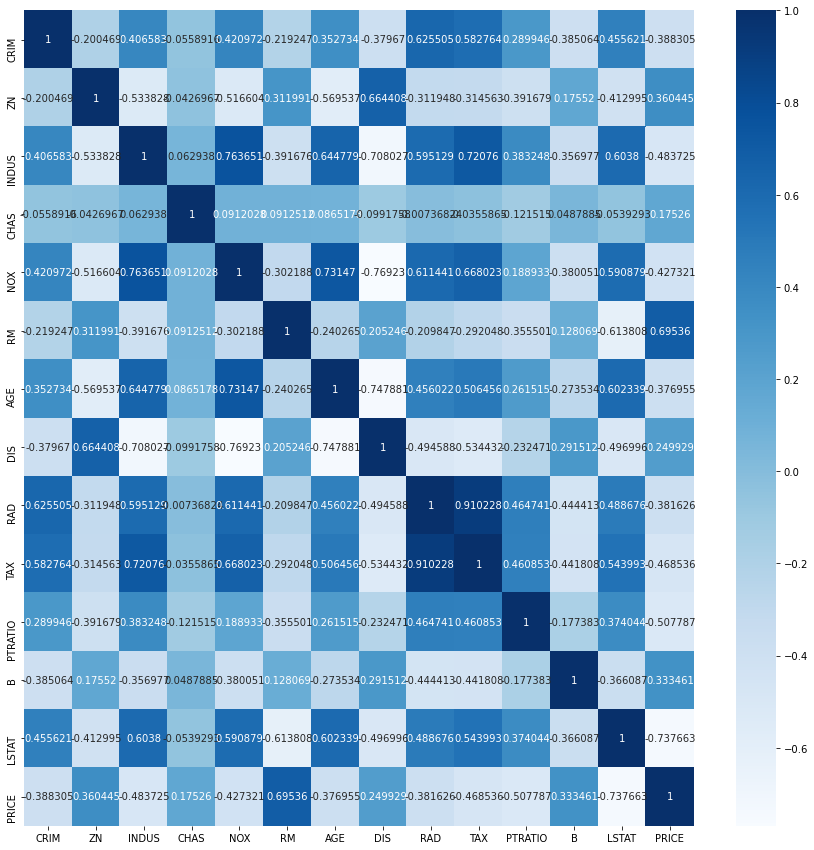

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='Blues',annot=True,cbar=True,fmt='g')
plt.show()

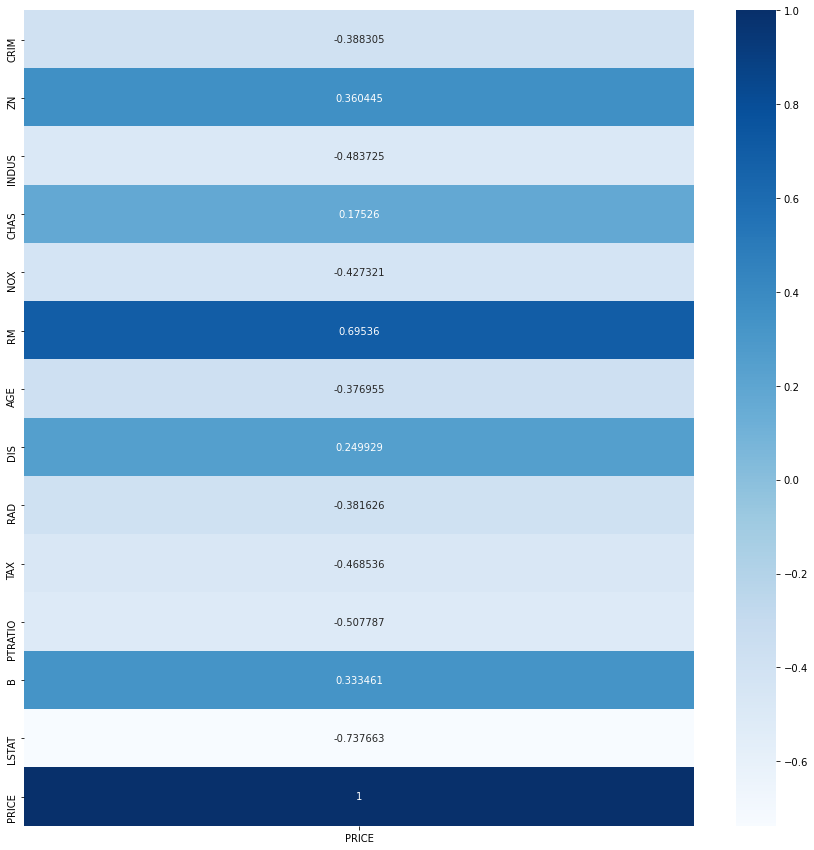

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(corr[['PRICE']],cmap='Blues',annot=True,cbar=True,fmt='g')
plt.show()

### Data Preparation

In [17]:
X=df.drop(['PRICE'],axis=1)
y=df[['PRICE']]

In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Train Test Split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [22]:
print(X.shape,y.shape)

(506, 13) (506, 1)


### Model Training

1) **Xtra Gradient Boosting (XGBoosting) Regressor**

In [23]:
xgb=XGBRegressor()

In [24]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred_train=xgb.predict(X_train)

In [26]:
y_pred=xgb.predict(X_test)

In [27]:
y_pred

array([23.25328  , 30.024755 , 15.632249 , 23.313478 , 17.775118 ,
       21.142563 , 20.19583  , 15.010124 , 21.23614  , 22.242369 ,
       20.457346 , 19.209145 ,  8.551788 , 21.210636 , 20.696491 ,
       26.74365  , 18.824339 , 10.525872 , 45.68885  , 14.116162 ,
       26.618996 , 24.94542  , 13.3510275, 20.87231  , 15.400073 ,
       15.636547 , 22.324673 , 12.777009 , 20.726126 , 22.56401  ,
       20.346395 , 22.303246 , 18.523277 , 21.764612 , 15.568828 ,
       15.683646 , 33.073547 , 19.115112 , 21.955132 , 22.399914 ,
       18.998787 , 31.328337 , 43.464993 , 18.20766  , 22.09233  ,
       14.353467 , 14.607512 , 22.716745 , 19.700527 , 27.072327 ,
       22.579268 , 35.133675 , 16.241447 , 25.214682 , 46.013332 ,
       21.89786  , 15.043295 , 32.93268  , 20.53731  , 16.568089 ,
       24.07178  , 34.34796  , 28.542194 , 16.977676 , 25.867334 ,
       15.649837 , 13.039615 , 23.00082  , 27.26897  , 15.414835 ,
       21.546648 , 31.72919  , 10.665012 , 20.770847 , 21.8483

### Calculate R2 score

In [28]:
metrics.r2_score(y_test,y_pred)

0.9105388132305845

In [29]:
xgb.score(X_test,y_test)

0.9105388132305845

### Mean Absolute Error

In [30]:
metrics.mean_absolute_error(y_test,y_pred)

1.9574996602301502

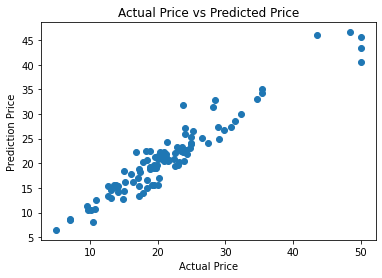

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2) **Linear Regression**

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
lr_pred=lr.predict(X_test)

In [35]:
lr_pred

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597],
       [24.90850512],
       [18.63883645],
       [-6.08842184],
       [21.75834668],
       [19.23922576],
       [26.19319733],
       [20.64773313],
       [ 5.79472718],
       [40.50033966],
       [17.61289074],
       [27.24909479],
       [30.06625441],
       [11.34179277],
       [24.16077616],
       [17.86058499],
       [15.83609765],
       [22.78148106],
       [14.57704449],
       [22.43626052],
       [19.19631835],
       [22.43383455],
       [25.21979081],
       [25.93909562],
       [17.70162434],
       [16.76911711],
       [16.95125411],
       [31.23340153],
       [20.13246729],
       [23.76579011],
       [24.6322925 ],
       [13.94204955],
       [32.25576301],
       [42.67251161],
       [17.32745046],
       [27.27618614],
       [16

In [36]:
lr_train=lr.predict(X_train)

In [37]:
metrics.r2_score(y_test,lr_pred)

0.6687594935356332

In [38]:
metrics.mean_absolute_error(y_test,lr_pred)

3.1890919658878354

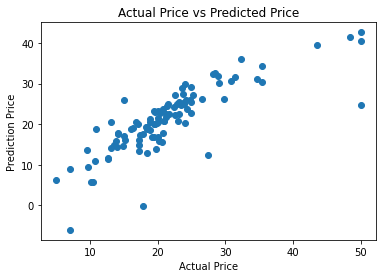

In [39]:
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

**Lasso**

In [40]:
s=StandardScaler()

In [41]:
lasso=Lasso(alpha=0.001,max_iter=100000)

In [42]:
X_train_s=s.fit_transform(X_train)

In [43]:
lasso.fit(X_train_s,y_train)

Lasso(alpha=0.001, max_iter=100000)

In [44]:
X_test_s=s.transform(X_test)

In [45]:
y_pred_l=lasso.predict(X_test_s)

In [46]:
metrics.r2_score(y_test,y_pred_l)

0.6687128230636585

In [47]:
metrics.mean_absolute_error(y_test,y_pred_l)

3.1881615674622297

**Ridge**

In [56]:
r=Ridge(alpha=0.001)

In [57]:
r.fit(X_train_s,y_train)

Ridge(alpha=0.001)

In [58]:
y_pred_r=r.predict(X_test_s)

In [59]:
metrics.r2_score(y_test,y_pred_r)

0.6687591970719646

In [60]:
metrics.mean_absolute_error(y_test,y_pred_r)

3.1890882815533232